# Time Series Analysis

## This script contains the following points:

### 1. Import Libraries

### 2. Import Data

### 3. Data Cleaning

### 4. Time series analysis: Decomposition

### 5. Testing for Stationarity

### 1. Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm  
import os
import warnings 

warnings.filterwarnings("ignore") 

plt.style.use('fivethirtyeight') 

#### 2. Import Data

In [2]:
# Creating path string to data folder
path = r'C:\Users\bexlu\Desktop\Career Foundry\Data Immersion\Achievement 6\Project Folder'

In [3]:
# Importing csv file using os library
data = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'Time_Series.csv'))

In [4]:
data.head(5)

,Date,Total_Hate_Crime
0,01/01/1991,876
1,01/04/1991,1043
2,01/07/1991,1457
3,01/10/1991,1213
4,01/01/1992,1624


In [5]:
# Set Date column as index
data_index = data.set_index('Date')

In [6]:
data_index.shape

(116, 1)

In [7]:
data_index.columns

Index(['Total_Hate_Crime'], dtype='object')

In [8]:
type(data_index)

pandas.core.frame.DataFrame

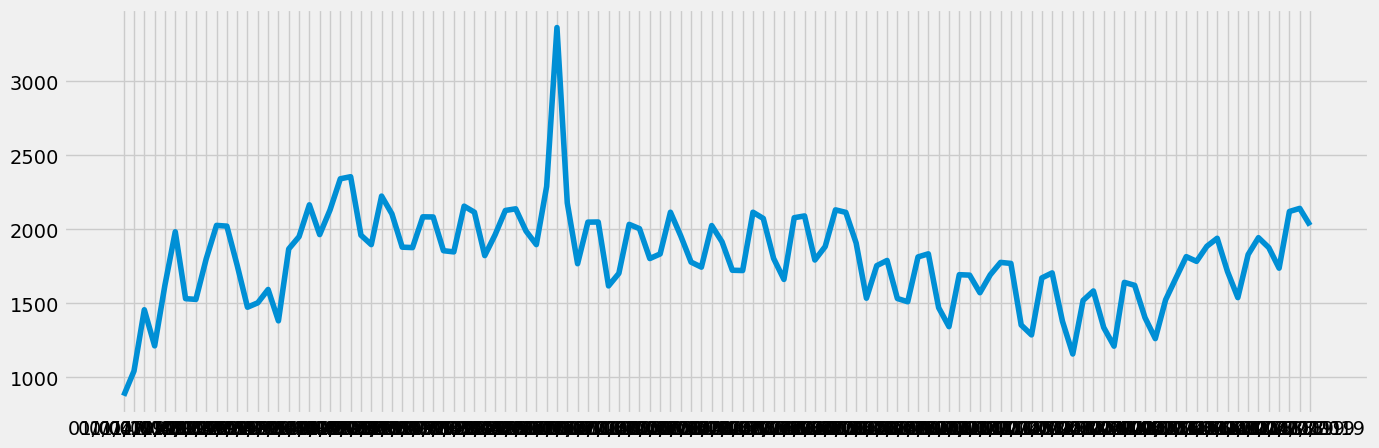

In [9]:
# Plot the data using matplotlib.
plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_index)

In [11]:
# Importing annual aggregated time series data csv file using os library
data_year = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'Time_Series_2.csv'))

In [12]:
data_year.head(5)

,Year,Total_Hate_Crime
0,01.01.1991,4589
1,01.01.1992,6667
2,01.01.1993,7608
3,01.01.1994,5954
4,01.01.1995,7950


In [13]:
# Set Date column as index
data_year_index = data_year.set_index('Year')

In [14]:
data_year_index.shape

(29, 1)

In [15]:
data_year_index.columns

Index(['Total_Hate_Crime'], dtype='object')

In [16]:
type(data_year_index)

pandas.core.frame.DataFrame

In [17]:
data_year_index.head(5)

,Total_Hate_Crime
Year,
01.01.1991,4589
01.01.1992,6667
01.01.1993,7608
01.01.1994,5954
01.01.1995,7950


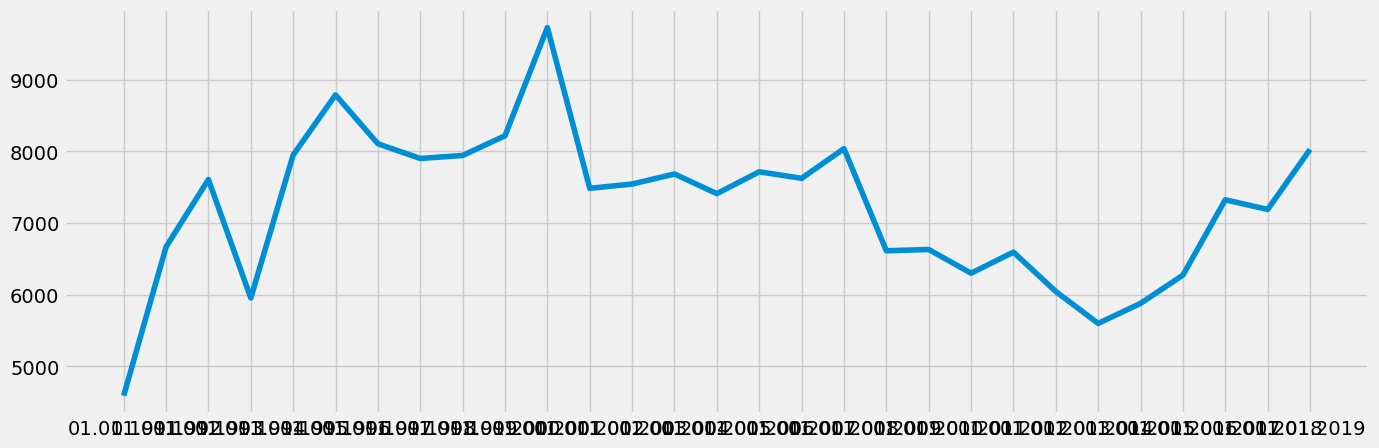

In [18]:
# Plot the data using matplotlib.
plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_year_index)

### 3. Data Cleaning

In [19]:
# Check for missing values 
data_year_index.isnull().sum() 

Total_Hate_Crime    0
dtype: int64

In [20]:
# Check for duplicates
dups = data_year_index.duplicated()
dups.sum()

0

In [22]:
data_year_index.head(5)

,Total_Hate_Crime
Year,
01.01.1991,4589
01.01.1992,6667
01.01.1993,7608
01.01.1994,5954
01.01.1995,7950


In [23]:
# Reset index to turn 'Year' into column
data_2 = data_year_index.reset_index()

In [24]:
data_2.head()

,Year,Total_Hate_Crime
0,01.01.1991,4589
1,01.01.1992,6667
2,01.01.1993,7608
3,01.01.1994,5954
4,01.01.1995,7950


In [25]:
# Set the "Year" column as the index, create datetime column from 'Year' and set as index, drop 'Year' column

from datetime import datetime

data_2['datetime'] = pd.to_datetime(data_2['Year']) # Create a datetime column from "Date.""
data_2 = data_2.set_index('datetime') # Set the datetime as the index of the dataframe.
data_2.drop(['Year'], axis=1, inplace=True) # Drop the "Date" column.
data_2.head()

,Total_Hate_Crime
datetime,
1991-01-01,4589
1992-01-01,6667
1993-01-01,7608
1994-01-01,5954
1995-01-01,7950


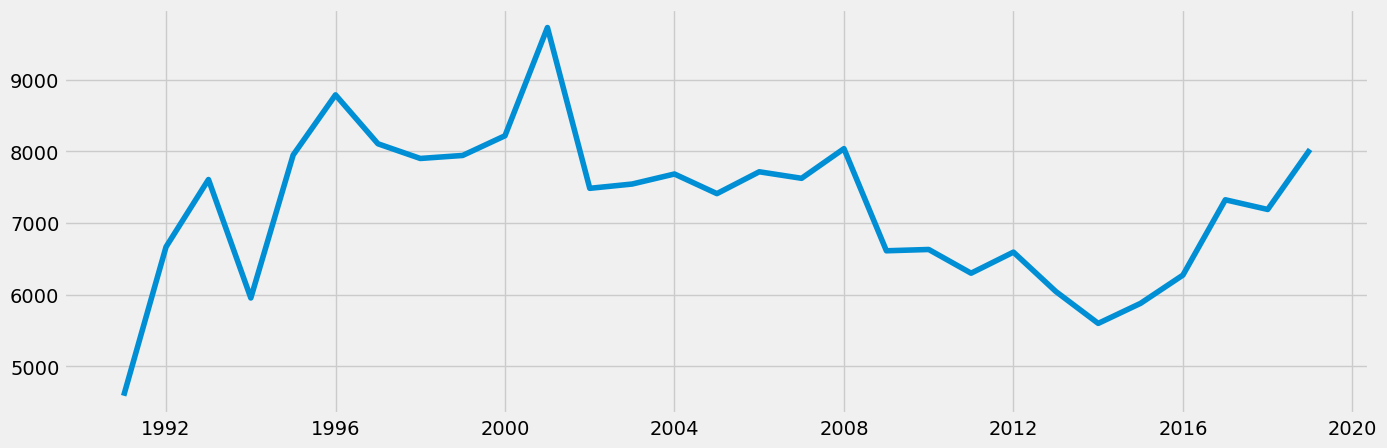

In [27]:
# Plot the new data set
plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_2)

### 4. Time series analysis: Decomposition

In [26]:
# Decompose the time series using an additive model
decomposition = sm.tsa.seasonal_decompose(data_2, model='additive')

In [28]:
# Define fixed size for all special charts
from pylab import rcParams 
rcParams['figure.figsize'] = 18, 7

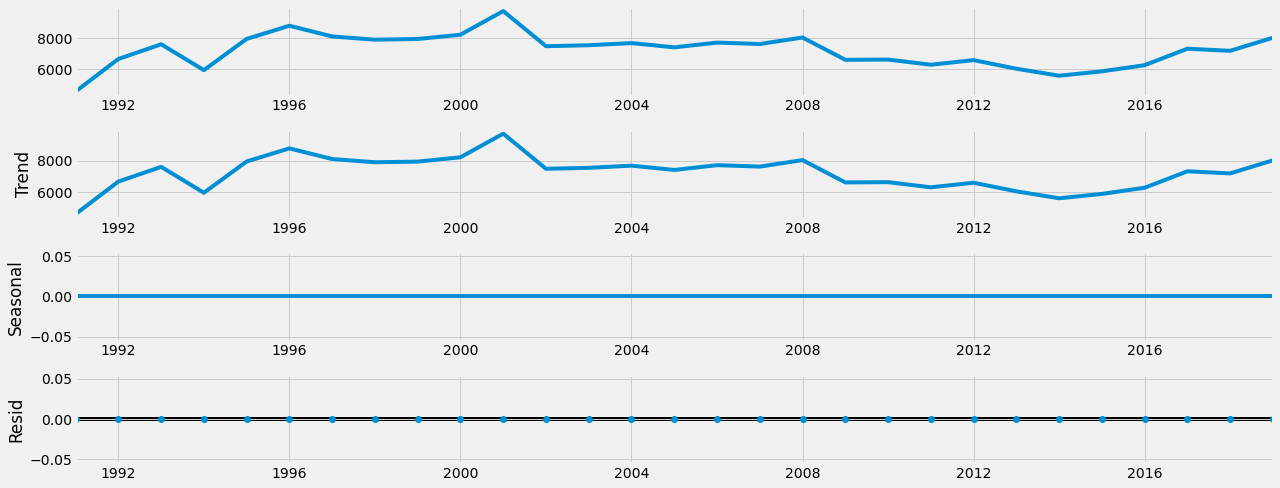

In [29]:
# Plot the separate components of time series
decomposition.plot()
plt.show()

We can see that the data has no noise and is not seasonal. The level and the trend match. There is a peak in hate crimes in
2001, the number of crimes decrease sharply from 2001-2002 where they plateau until 2008. We then observe a descrease in crimes until 2014 when they start to increase steadily until 2019. Whilst crimes reported in 2019 do not quite match the peak of our data in 2001, they are only slightly below that high level. I wonder if a spike in hate crime occurred in the USA after September 11, it will be interesting to drill down into the data to see if this spike is caused by an uplift in hate crimes motivated by an Anti-Muslim Bias.

### 5. Testing for Stationarity

In [31]:
from statsmodels.tsa.stattools import adfuller # Import the adfuller() function

def dickey_fuller(timeseries): # Define the function
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(data_2['Total_Hate_Crime'])

Dickey-Fuller Stationarity test:
Test Statistic                 -3.498953
p-value                         0.008014
Number of Lags Used             0.000000
Number of Observations Used    28.000000
Critical Value (1%)            -3.688926
Critical Value (5%)            -2.971989
Critical Value (10%)           -2.625296
dtype: float64


I have a small p-value of 0.008. The test statistic is smaller than the critical value at both the five and ten percent significance levels, meaning that I can reject the nukk hypothesis and consider my time series data to be stationary.

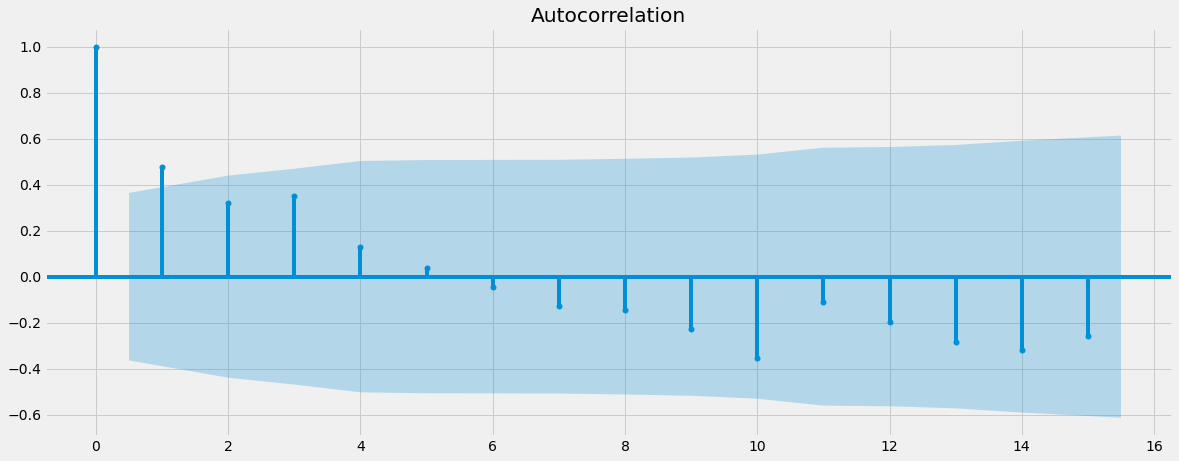

In [32]:
# Plot autocorrelations

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf 

plot_acf(data_2)
plt.show()

My data is not autocorrelated.